In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dateutil


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
detective = pd.read_csv("https://tinyurl.com/ydgedlg3")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
detective.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
detective

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


In [5]:
detective.isnull()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
191636,False,False,False,False,False,False,False,True,True,False
191637,False,False,False,False,False,False,False,True,True,False
191638,False,False,False,False,False,False,False,True,True,False
191639,False,False,False,False,False,False,False,True,True,False


1.
The numerical features are ID, Date, Beat, District, CommunityArea, Year.

And the categorical features are Arrest and Domestic.

2.Find out the percentage of missing values in each feature column.

In [6]:
null_na = detective.isnull().mean().round(4)*100
null_na

Unnamed: 0              0.00
ID                      0.00
Date                    0.00
LocationDescription     0.00
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District               22.46
CommunityArea          12.84
Year                    0.00
dtype: float64

3.Remove columns having missing values from the dataset.

In [7]:
df = detective.dropna(axis=1)
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2012
...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,2001


4. Plot the histogram for community feature. Write down your observations in a text cell.


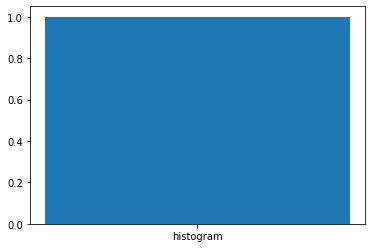

In [8]:

histogram=detective.CommunityArea.dropna()
plt.hist('histogram',bins='auto')
plt.show()

A histogram is most used  and understable graph for frequency distributions.From the above histogram,x-axis is the CommunityArea series and bins are taken auto.Here the width is large as you seen in the graph .From here,the width shows having continuous values in a particular band.

5.Plot countplot for district feature. Write down your observation in a text cell.



<function matplotlib.pyplot.show>

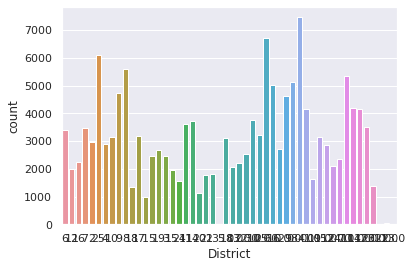

In [9]:

sns.set(style="darkgrid")
countplt = sns.countplot(x='District', data=detective)
plt.show

A countplot is kind of likea histogram or a bar graph for some categorical area.here x-axiz is denoted as district and y-axis is count variable.it defines as at one district level count value.

6. On which weekday did most motor vehicle thefts occur ?

In [10]:
detective['Date']=pd.to_datetime(detective.Date) 
detective.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [11]:

day=detective.Date.dt.day_name()
day.mode()

0    Friday
dtype: object

friday occurs less thefts .

7.In which month did least thefts occur ? 

In [12]:
month=detective.Date.dt.month_name()
month.value_counts(ascending=False)

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Date, dtype: int64

8.. Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?


In [13]:
arres=detective[detective['Arrest']==True]
month=arres.Date.dt.month_name()
month.mode()

0    January
dtype: object


9. Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? 
(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)



In [14]:
term1=arres[arres['Year']>=2007]
term1.shape
term2=arres[arres['Year']<2007]
term2.shape
if term1.shape>term2.shape:
    print('Second half i.e; 2nd 6years has highest arrests')
else:
    print('First half i.e; 1st 6 years has highest arrests')

First half i.e; 1st 6 years has highest arrests


10.For what proportion of motor vehicle thefts in 2001 was an arrest made?
 (Note: in this question and many others in the course, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1)



In [15]:
propo=arres.Year.value_counts(normalize=True)
propo

2001    0.138517
2002    0.136135
2003    0.115731
2004    0.108973
2005    0.098352
2006    0.083805
2007    0.078012
2008    0.065654
2009    0.054068
2010    0.045121
2011    0.040229
2012    0.035402
Name: Year, dtype: float64

11.Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?
(Note locations here indicate bank, hotel etc)


In [16]:
detective.drop(detective[detective['LocationDescription']=='OTHER'].index,inplace=True)
count=detective.LocationDescription.value_counts() 
count.head()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

12.On which day of the week do the most motor vehicle thefts at gas stations happen?

In [17]:
specific=detective[detective['LocationDescription']=='GAS STATION']
spec=specific.Date.dt.day_name()
spec.mode()

0    Saturday
dtype: object

13What is the most theft prone location?


In [18]:
detective.LocationDescription.mode()

0    STREET
dtype: object

14Extract numerical features from the dataset and make separate tables for numerical features.


In [19]:
numerical_features = [feature for feature in detective.columns if detective[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

detective[numerical_features].head()

Number of numerical variables:  7


,Unnamed: 0,ID,Date,Arrest,Domestic,Beat,Year
0,0,8951354,2012-12-31 23:15:00,False,False,623,2012
1,1,8951141,2012-12-31 22:00:00,False,False,1213,2012
2,2,8952745,2012-12-31 22:00:00,False,False,1622,2012
3,3,8952223,2012-12-31 22:00:00,False,False,724,2012
4,4,8951608,2012-12-31 21:30:00,False,False,211,2012


In [20]:
num=detective.select_dtypes(include=np.number)
num

,Unnamed: 0,ID,Beat,Year
0,0,8951354,623,2012
1,1,8951141,1213,2012
2,2,8952745,1622,2012
3,3,8952223,724,2012
4,4,8951608,211,2012
...,...,...,...,...
191636,191636,1310068,1123,2001
191637,191637,1313404,2023,2001
191638,191638,1313442,911,2001
191639,191639,1563324,1712,2001


15 Plot the scatter plot b/w location and arrest features. Write down your observations in a text  cell.



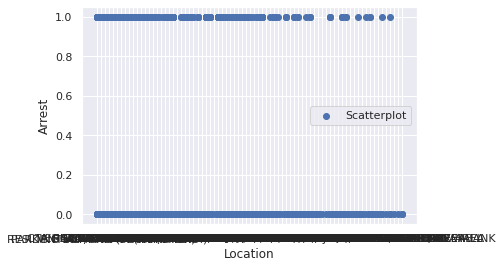

In [21]:
x=detective.LocationDescription
y=detective.Arrest 
plt.xlabel('Location')
plt.ylabel('Arrest')
plt.scatter(x,y,label='Scatterplot')
plt.legend()
plt.show()

in the scatter plot it shows about the values 1 or 0. here arrest has the values i.e; (True,False) to show on graph they are indicated as 1 or 0.it shows less arrest are made then escape.


16. Find the outliers in the beat feature. And drop the index column.


In [22]:
detective.sort_values('Beat')

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
65277,65277,6322196,2008-06-22 06:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,111,1,28,2008
63919,63919,6401343,2008-07-21 09:00:00,STREET,False,False,111,1,28,2008
143608,143608,2830413,2003-07-13 12:00:00,STREET,False,False,111,1,28,2003
82812,82812,5443488,2007-03-27 18:00:00,STREET,False,False,111,1,28,2007
66565,66565,6261364,2008-05-21 10:30:00,STREET,True,False,111,1,28,2008
...,...,...,...,...,...,...,...,...,...,...
138212,138212,3031536,2003-11-05 13:00:00,RESIDENCE-GARAGE,True,False,2535,25,22,2003
26807,26807,7965833,2011-03-10 19:00:00,STREET,False,False,2535,25,23,2011
157522,157522,2583039,2002-09-17 10:00:00,RESIDENCE-GARAGE,False,True,2535,NaN,23,2002
98323,98323,4668060,2006-03-25 20:30:00,STREET,False,False,2535,25,23,2006


In [23]:
q1,q3=np.percentile(detective['Beat'],[25,75])
iqr=q3-q1
l_b=q1-(1.5*iqr)
u_b=q3+(1.5*iqr)
l_b,u_b

(-794.5, 3249.5)

17Convert domestic feature variables into binary variables (i.e 1 or 0), and write code to find out strongly correlated features in a given dataset.


In [24]:
detective.Domestic=detective['Domestic'].astype(int)
detective.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,0,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,0,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,0,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,0,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,0,211,2,35,2012


18Plot the correlation matrix for the  dataset. And what are continuous and distinct features in numerical features.write code identify continuous and distinct features.




In [25]:
S =detective.corr()
S

,Unnamed: 0,ID,Arrest,Domestic,Beat,Year
Unnamed: 0,1.000000,-0.997200,0.089324,-0.029315,0.002713,-0.995019
ID,-0.997200,1.000000,-0.090679,0.030151,-0.001875,0.995630
Arrest,0.089324,-0.090679,1.000000,0.013785,-0.002908,-0.090133
Domestic,-0.029315,0.030151,0.013785,1.000000,-0.006670,0.030337
Beat,0.002713,-0.001875,-0.002908,-0.006670,1.000000,-0.002742
Year,-0.995019,0.995630,-0.090133,0.030337,-0.002742,1.000000


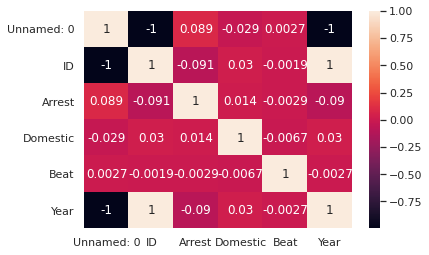

In [26]:
sns.heatmap(S,annot=True)